In [15]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns


In [16]:
df=pd.read_csv('EmployeeAttrition.csv')



In [17]:
print(df['DailyRate'].value_counts())
df.info()
# df.to_csv('EmployeeAttrition.csv',index=False)

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1

In [18]:
numeric_features = [
    "Age", "DailyRate", "DistanceFromHome", "Education",
    "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement",
    "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate",
    "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating",
    "RelationshipSatisfaction", "StockOptionLevel",
    "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
    "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

categorical_features = [
    "Department", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"
]


x=df.drop(columns=['Attrition'],axis=1)
y=df['Attrition']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

preprocess=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(handle_unknown="ignore",drop="first"),categorical_features)
    ]
)
pipe=Pipeline([
    ('step',preprocess),
    ('pca',PCA(0.95)),
    ('model',RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42
))
])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)

print('Accuracy : ',np.round(accuracy_score(y_test,pred)*100,2),'%')



Accuracy :  81.29 %


<Axes: >

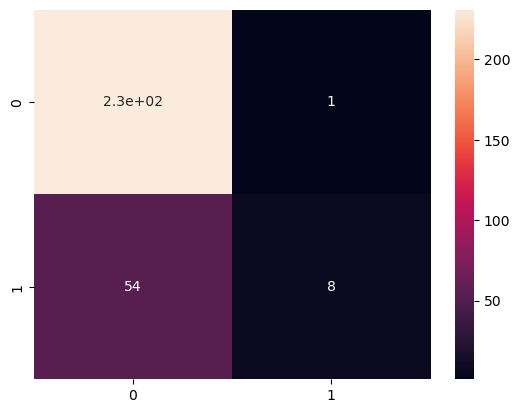

In [19]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, x, y, cv=5, scoring="accuracy")
print(scores.mean())

0.8496598639455784


In [21]:
data=pd.read_csv('EmployeeAttrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [22]:
import joblib 
joblib.dump(pipe,'EmployeeAttritionModel.pkl')

['EmployeeAttritionModel.pkl']

In [24]:
model=joblib.load('EmployeeAttritionModel.pkl')

input_df = pd.DataFrame([{
    "Age": 41,
    "DailyRate": 1102,
    "Department": "Sales",
    "DistanceFromHome": 1,
    "Education": 2,
    "EnvironmentSatisfaction": 2,
    "Gender": "Female",
    "HourlyRate": 94,
    "JobInvolvement": 3,
    "JobLevel": 2,
    "JobRole": "Sales Executive",
    "JobSatisfaction": 4,
    "MaritalStatus": "Single",
    "MonthlyIncome": 5993,
    "MonthlyRate": 19479,
    "NumCompaniesWorked": 8,
    "Over18":'Y',
    "OverTime": "Yes",
    "PercentSalaryHike": 11,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 1,
    "StockOptionLevel": 0,
    "TotalWorkingYears": 8,
    "TrainingTimesLastYear": 0,
    "WorkLifeBalance": 1,
    "YearsAtCompany": 6,
    "YearsInCurrentRole": 4,
    "YearsSinceLastPromotion": 0,
    "YearsWithCurrManager": 5
}])

prediction=model.predict(input_df).item()
result = "Leave" if prediction== 1 else "Stay"
print("Employee likely to:", result)


Employee likely to: Leave
